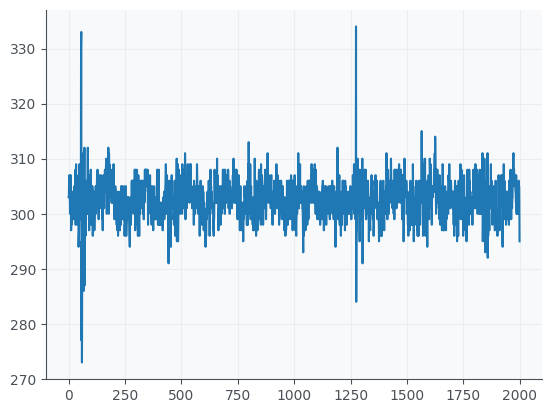

In [355]:
"""
Created on Wed Sep 21 20:49:08 2022

@author: Francisco Campuzano
"""
import serial, time
import numpy as np
import matplotlib.pyplot as plt


arduino = serial.Serial('COM3',9600,timeout=0.01)# Se debe indicar el puerto serial y la velocidad de transmisión 

time.sleep(2)

numero_datos = 2000 # esto corresponde al numero de datos que se va adquirir, se puede modificar pero 1000 es un buen numero 
EMG = np.ndarray((0),dtype=int) # aquí se almacenará la señal 

# mientras el arreglo no tenga los datos que requiero los solicito
while EMG.shape[0] < numero_datos: 
    
    # esto lee lo que haya en el buffer
    datos = arduino.readlines(arduino.inWaiting())
    
    datos_por_leer = len(datos)
    
  
    # Si hay mas datos de los que quiero leer
    # solo me quedo con la cantidad que me interesa
    if len(datos) > numero_datos:
        datos = datos[0:numero_datos]
        # creo un arreglo de ceros para leer estos valores
        valores_leidos = np.zeros(numero_datos,dtype = int)
    else:
        # creo un arreglo de ceros para leer estos valores
        valores_leidos = np.zeros(datos_por_leer,dtype = int)

    
    posicion = 0
    #se convierten los datos a valores numericos de voltaje. 
    for dato in datos:
        # voy a tratar de convertir los datos
        try:
            # elimino los saltos de linea y caracter de retorno y convierto a entero
            valores_leidos[posicion] = int(dato.decode().strip())
        except:
            # si no puedo convertir completo la muestra con el anterior
            # valores_leidos[posicion] = 0  # alternativa
            valores_leidos[posicion] = valores_leidos[posicion-1]
        posicion = posicion + 1
    # agrego los datos leidos al arreglo
    EMG = np.append(EMG,valores_leidos)
    # Introduzco un delay para que se llene de nuevo el buffer
    time.sleep(2)

# como la ultima lectura puede tener mas datos de los que necesito descarto las muestras restantes
EMG = EMG[0:numero_datos]


# ya con los datos leidos podemos graficar
plt.plot(EMG)
#plt.plot(EMG[100:])
plt.show()

arduino.close()  # Cerrar puerto serial, siempre debe cerrarse

Una vez capturan los datos de EMG, se procede a guardar estos en un archivo formato csv, para su posterior utilizacion 

In [356]:
import numpy
a = EMG
numpy.savetxt("EMG_mov_SUJ12.csv", a, delimiter=",")

In [203]:
import numpy as np
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import scipy.io as sio
import biosppy 
from statsmodels.tsa.stattools import adfuller
from scipy.ndimage import shift

Movimiento 1: flexion bicep

In [198]:
empty_dic={}
for i in range(1,13):
    df = pandas.read_csv('EMG_SUJ'+str(i)+'.csv')
    primerd=float(df.columns[0])
    df_array=np.asarray(df)
    df_list=df_array.squeeze().tolist()
    df_list.insert(0,primerd)
    data=np.asarray(df_list)
    empty_dic["sujeto " + str(i)]=data
df=pandas.DataFrame(data=empty_dic)

In [199]:
df

,sujeto 1,sujeto 2,sujeto 3,sujeto 4,sujeto 5,sujeto 6,sujeto 7,sujeto 8,sujeto 9,sujeto 10,sujeto 11,sujeto 12
0,275.0,0.0,0.0,0.0,393.0,492.0,0.0,283.0,0.0,0.0,309.0,312.0
1,278.0,315.0,300.0,306.0,344.0,493.0,446.0,305.0,306.0,375.0,301.0,315.0
2,298.0,307.0,296.0,281.0,382.0,550.0,327.0,263.0,286.0,187.0,314.0,304.0
3,315.0,326.0,290.0,223.0,358.0,511.0,312.0,289.0,263.0,396.0,306.0,304.0
4,240.0,244.0,296.0,489.0,395.0,504.0,257.0,273.0,244.0,343.0,302.0,305.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,339.0,149.0,245.0,306.0,202.0,334.0,332.0,360.0,294.0,272.0,279.0,423.0
1996,371.0,90.0,220.0,308.0,451.0,334.0,364.0,348.0,254.0,304.0,315.0,71.0
1997,347.0,246.0,251.0,265.0,281.0,339.0,373.0,293.0,342.0,320.0,291.0,281.0
1998,381.0,370.0,338.0,302.0,277.0,333.0,345.0,383.0,306.0,263.0,312.0,395.0


movimiento 2: pronacion bicep

In [358]:
empty_dic={}
for i in range(1,13):
    df2 = pandas.read_csv('EMG_mov_SUJ'+str(i)+'.csv')
    primerd=float(df2.columns[0])
    df2_array=np.asarray(df2)
    df_list2=df2_array.squeeze().tolist()
    df_list2.insert(0,primerd)
    data2=np.asarray(df_list2)
    empty_dic["sujeto " + str(i)]=data2
df2=pandas.DataFrame(data=empty_dic)

In [359]:
df2

,sujeto 1,sujeto 2,sujeto 3,sujeto 4,sujeto 5,sujeto 6,sujeto 7,sujeto 8,sujeto 9,sujeto 10,sujeto 11,sujeto 12
0,298.0,302.0,303.0,297.0,302.0,302.0,307.0,299.0,301.0,303.0,305.0,303.0
1,300.0,301.0,303.0,299.0,302.0,306.0,300.0,303.0,304.0,303.0,301.0,303.0
2,302.0,304.0,304.0,302.0,303.0,311.0,296.0,303.0,303.0,300.0,305.0,306.0
3,302.0,307.0,298.0,300.0,302.0,307.0,301.0,305.0,304.0,304.0,303.0,307.0
4,304.0,303.0,295.0,300.0,303.0,307.0,304.0,306.0,301.0,302.0,303.0,307.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,307.0,298.0,303.0,303.0,303.0,309.0,302.0,301.0,301.0,304.0,300.0,306.0
1996,311.0,297.0,307.0,299.0,296.0,303.0,305.0,300.0,306.0,305.0,306.0,302.0
1997,298.0,299.0,307.0,300.0,302.0,303.0,306.0,296.0,297.0,303.0,305.0,305.0
1998,303.0,309.0,307.0,298.0,303.0,304.0,306.0,296.0,304.0,299.0,305.0,303.0


In [185]:
def TKEO(señal):
      
      # Calcula el atraso y el adelanto de la señal utilizando la función shift
     atraso=shift(señal,1,cval=0) # Atraso un paso
     adelanto=shift(señal,-1,cval=0) # Adelanto un paso
     
     # Calcula el TKEO de la señal utilizando la fórmula del operador
     return((señal**2)-atraso*adelanto)

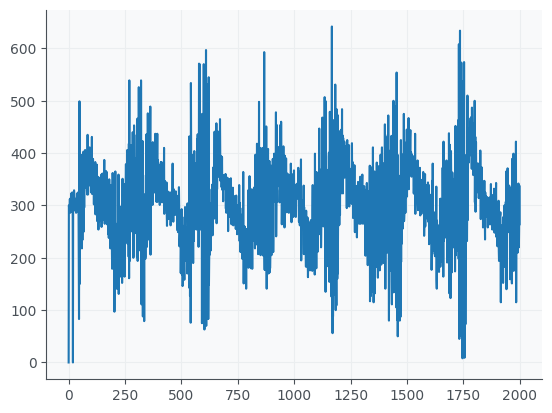

In [394]:
plt.plot(np.asarray(df.iloc[:,2]))

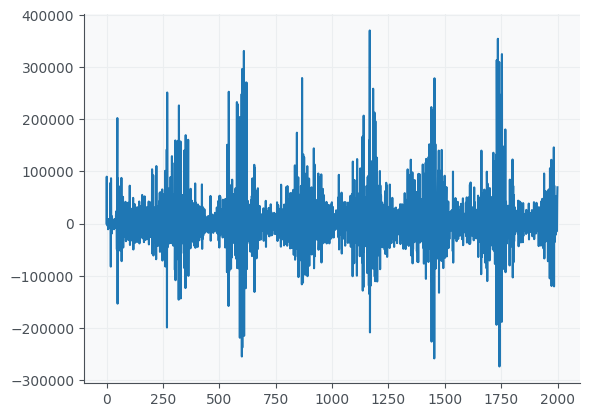

In [395]:
plt.plot(TKEO(np.asarray(df.iloc[:,2])))

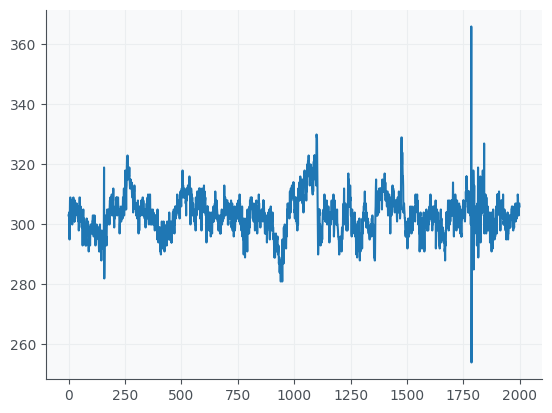

In [392]:
plt.plot(np.asarray(df2.iloc[:,2]))

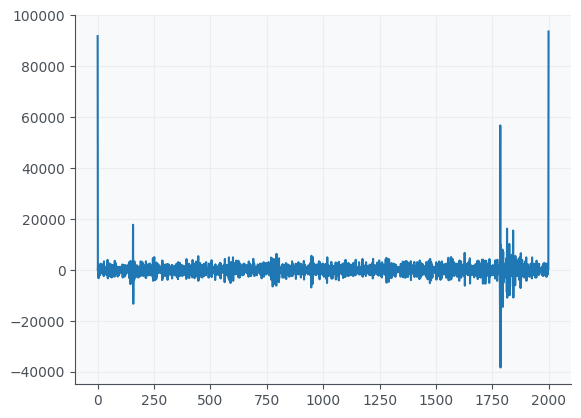

In [393]:
plt.plot(TKEO(np.asarray(df2.iloc[:,2])))

In [187]:
def RMS(s):
  N=len(s) # Obtener la longitud de la señal
  return ((1/N)*sum(s**2))**0.5 # Calcular RMS utilizando la fórmula: sqrt((1/N) * sum(s^2))

def mean_absolute_value(s):
    N=len(s)
    return ((1/N)*sum(abs(s))) # Calcular el valor absoluto promedio utilizando la fórmula: (1/N) * sum(abs(s))

def mean_absolute_value_slope(signal):
     # Calcular la diferencia entre valores consecutivos en la señal
     # Calcular el valor absoluto promedio de las diferencias
    return np.mean(np.abs(np.diff(signal)))

def slope_sign_changes(signal):
    # Calcular la diferencia entre valores consecutivos en la señal
    # Calcular el signo de las diferencias consecutivas
    # Calcular el número de cambios en el signo de la pendiente
    return np.sum(np.diff(np.sign(np.diff(signal))) != 0)

def waveform_length(signal):
    # Calcular la suma de los valores absolutos de las diferencias
    return np.sum(np.abs(np.diff(signal)))

def zero_crossing(signal):
    # Calcular el número de cruces por cero contando los cambios de signo
    return np.sum(np.diff(np.sign(signal)) != 0)


Creacion nuevo dataframe (flexion de bicep) (TKEO)

In [287]:
# Se inicializa un diccionario vacío para almacenar las métricas
dic2 = {}

def func(df,i):
    
    # Iterar sobre cada sujeto especificado

    suj = df.iloc[:,i]
    
    # Se aplica el operador TKEO a la señal
    suj = TKEO(suj)

    # Se almacenan las métricas en el diccionario

    dic2["TKEO"] = 1
    dic2["RMS"] = RMS(suj)
    dic2["var"] = np.var(suj)
    dic2["mav"] = mean_absolute_value(suj)
    dic2["mavs"] = mean_absolute_value_slope(suj)
    dic2["ssc"] = slope_sign_changes(suj)
    dic2["wl"] = waveform_length(suj)
    dic2["zc"] = zero_crossing(suj)

# Se crea un DataFrame vacío para almacenar los resultados
output = pandas.DataFrame()

# Se itera sobre todos los sujetos
for i in range(0, 12):
    # Se limpia el diccionario para cada sujeto
    dic2 = {}
    # Se calculan las métricas para el sujeto actual
    func(df,i)
    # Se crea un DataFrame a partir del diccionario y se concatena al DataFrame de salida
    df_dictionary = pandas.DataFrame([dic2])
    output = pandas.concat([output, df_dictionary], ignore_index=True)

# Se crea un diccionario para los índices de los sujetos
dic_index = {"sujetos": []}
for i in range(1, 13):
    dic_index["sujetos"].append("sujeto" + str(i))

Creacion nuevo dataframe (pronacion) (TKEO)

In [362]:
# Se inicializa un diccionario vacío para almacenar las métricas
dic2 = {}

def func(df,i):
    
    # Iterar sobre cada sujeto especificado

    suj = df.iloc[:,i]
    
    # Se aplica el operador TKEO a la señal
    suj = TKEO(suj)

    # Se almacenan las métricas en el diccionario

    dic2["TKEO"] = 1
    dic2["RMS"] = RMS(suj)
    dic2["var"] = np.var(suj)
    dic2["mav"] = mean_absolute_value(suj)
    dic2["mavs"] = mean_absolute_value_slope(suj)
    dic2["ssc"] = slope_sign_changes(suj)
    dic2["wl"] = waveform_length(suj)
    dic2["zc"] = zero_crossing(suj)

# Se crea un DataFrame vacío para almacenar los resultados
output_prona = pandas.DataFrame()

# Se itera sobre todos los sujetos
for i in range(0, 12):
    # Se limpia el diccionario para cada sujeto
    dic2 = {}
    # Se calculan las métricas para el sujeto actual
    func(df2,i)
    # Se crea un DataFrame a partir del diccionario y se concatena al DataFrame de salida
    df_dictionary = pandas.DataFrame([dic2])
    output_prona = pandas.concat([output_prona, df_dictionary], ignore_index=True)

# Se crea un diccionario para los índices de los sujetos
dic_index = {"sujetos": []}
for i in range(1, 13):
    dic_index["sujetos"].append("sujeto" + str(i))

Dataframe flexion codo (TKEO)

In [288]:
output.index=(dic_index["sujetos"])
output

,TKEO,RMS,var,mav,mavs,ssc,wl,zc
sujeto1,1,32850.346336,1.076746e+09,24190.9580,44629.057029,1529,89213485.0,1460
sujeto2,1,73208.325125,5.297378e+09,46214.8020,84174.159580,1525,168264145.0,1461
sujeto3,1,58447.332358,3.387967e+09,37656.9190,68669.552776,1522,137270436.0,1443
sujeto4,1,56995.698846,3.227853e+09,37834.1545,69034.264632,1546,137999495.0,1471
sujeto5,1,34986.922038,1.221671e+09,25293.8425,46906.100050,1550,93765294.0,1514
sujeto6,1,32120.038177,1.029151e+09,22292.3315,41378.743372,1541,82716108.0,1472
sujeto7,1,102549.651539,1.042854e+10,67736.5670,125343.864432,1540,250562385.0,1461
sujeto8,1,52675.749196,2.761751e+09,35630.7490,65421.557279,1525,130777693.0,1436
sujeto9,1,41362.260186,1.702893e+09,28654.6725,51769.760880,1503,103487752.0,1451
sujeto10,1,45501.421363,2.061315e+09,31286.0375,57568.884942,1546,115080201.0,1470


Dataframe pronacion (TKEO)

In [363]:
output_prona.index=(dic_index["sujetos"])
output_prona

,TKEO,RMS,var,mav,mavs,ssc,wl,zc
sujeto1,1,3965.483410,1.571363e+07,2173.0930,3867.807904,1502,7731748.0,1437
sujeto2,1,3947.821341,1.557395e+07,2068.2165,3671.021511,1529,7338372.0,1430
sujeto3,1,3959.626009,1.566699e+07,1705.9465,3029.958479,1533,6056887.0,1440
sujeto4,1,4339.464558,1.881997e+07,1974.5235,3563.763882,1542,7123964.0,1448
sujeto5,1,3945.744797,1.555650e+07,1791.9170,3149.698349,1506,6296247.0,1446
sujeto6,1,3441.833311,1.183615e+07,1468.4150,2579.036518,1495,5155494.0,1412
sujeto7,1,3700.765177,1.368499e+07,1600.5505,2821.673837,1526,5640526.0,1433
sujeto8,1,3802.318822,1.444684e+07,1772.7245,3162.493747,1533,6321825.0,1459
sujeto9,1,4285.450284,1.835304e+07,1986.7365,3558.319660,1546,7113081.0,1479
sujeto10,1,3504.988849,1.227529e+07,1684.6740,3010.755378,1546,6018500.0,1471


Creacion nuevo dataframe (flexion bicep) (sin TKEO)

In [376]:
# Se inicializa un diccionario vacío para almacenar las métricas
dic2 = {}

def func(df,i):
    # Se obtienen los nombres de los canales del DataFrame
    #canales = df.columns.values
    
    # Iterar sobre cada sujeto especificado

    suj = df.iloc[:,i]

    # Se almacenan las métricas en el diccionario

    dic2["TKEO"] = 0
    dic2["RMS"] = RMS(suj)
    dic2["var"] = np.var(suj)
    dic2["mav"] = mean_absolute_value(suj)
    dic2["mavs"] = mean_absolute_value_slope(suj)
    dic2["ssc"] = slope_sign_changes(suj)
    dic2["wl"] = waveform_length(suj)
    dic2["zc"] = zero_crossing(suj)

# Se crea un DataFrame vacío para almacenar los resultados
output2 = pandas.DataFrame()

# Se itera sobre todos los sujetos
for i in range(0, 12):
    # Se limpia el diccionario para cada sujeto
    dic2 = {}
    # Se calculan las métricas para el sujeto actual
    func(df,i)
    # Se crea un DataFrame a partir del diccionario y se concatena al DataFrame de salida
    df_dictionary = pandas.DataFrame([dic2])
    output2 = pandas.concat([output2, df_dictionary], ignore_index=True)

# Se crea un diccionario para los índices de los sujetos
dic_index = {"sujetos": []}
for i in range(1, 13):
    dic_index["sujetos"].append("sujeto" + str(i))

Dataframe flexion codo (sin TKEO)

In [377]:
output2.index=(dic_index["sujetos"])
output2

,TKEO,RMS,var,mav,mavs,ssc,wl,zc
sujeto1,0,308.546340,4017.378844,301.9660,45.187094,1354,90329.0,0
sujeto2,0,316.849893,8881.554900,302.5100,86.627814,1349,173169.0,1
sujeto3,0,312.552707,6513.278338,301.9535,72.208104,1334,144344.0,3
sujeto4,0,316.502111,7042.111050,305.1745,69.805403,1365,139541.0,1
sujeto5,0,306.649032,2660.430600,302.2800,46.302151,1419,92558.0,0
sujeto6,0,313.617067,6833.381298,302.5265,41.781891,1360,83522.0,0
sujeto7,0,325.604710,11792.757556,306.9620,119.801401,1316,239483.0,1
sujeto8,0,310.263212,3716.190060,304.2155,67.053027,1299,134039.0,0
sujeto9,0,308.624140,2702.702204,304.2140,53.031516,1310,106010.0,1
sujeto10,0,308.213998,3024.691944,303.2675,57.943472,1355,115829.0,1


Creacion nuevo dataframe (pronacion) (sin TKEO)

In [366]:
# Se inicializa un diccionario vacío para almacenar las métricas
dic2 = {}

def func(df,i):
    # Se obtienen los nombres de los canales del DataFrame
    #canales = df.columns.values
    
    # Iterar sobre cada sujeto especificado

    suj = df.iloc[:,i]

    # Se almacenan las métricas en el diccionario

    dic2["TKEO"] = 0
    dic2["RMS"] = RMS(suj)
    dic2["var"] = np.var(suj)
    dic2["mav"] = mean_absolute_value(suj)
    dic2["mavs"] = mean_absolute_value_slope(suj)
    dic2["ssc"] = slope_sign_changes(suj)
    dic2["wl"] = waveform_length(suj)
    dic2["zc"] = zero_crossing(suj)

# Se crea un DataFrame vacío para almacenar los resultados
output2_prona = pandas.DataFrame()

# Se itera sobre todos los sujetos
for i in range(0, 12):
    # Se limpia el diccionario para cada sujeto
    dic2 = {}
    # Se calculan las métricas para el sujeto actual
    func(df2,i)
    # Se crea un DataFrame a partir del diccionario y se concatena al DataFrame de salida
    df_dictionary = pandas.DataFrame([dic2])
    output2_prona = pandas.concat([output2_prona, df_dictionary], ignore_index=True)

# Se crea un diccionario para los índices de los sujetos
dic_index = {"sujetos": []}
for i in range(1, 13):
    dic_index["sujetos"].append("sujeto" + str(i))

Dataframe pronacion (sin TKEO)

In [372]:
output2_prona.index=(dic_index["sujetos"])
output2_prona

,TKEO,RMS,var,mav,mavs,ssc,wl,zc
sujeto1,0,303.381636,33.148071,303.3270,4.064032,1419,8124.0,0
sujeto2,0,303.179753,25.012318,303.1385,3.790895,1441,7578.0,0
sujeto3,0,303.245683,44.379744,303.1725,3.179090,1448,6355.0,0
sujeto4,0,302.871625,23.698444,302.8325,3.618809,1434,7234.0,0
sujeto5,0,303.422453,22.120004,303.3860,3.304152,1469,6605.0,0
sujeto6,0,302.708745,11.953279,302.6890,2.739370,1410,5476.0,0
sujeto7,0,302.737355,15.956479,302.7110,2.960480,1408,5918.0,0
sujeto8,0,302.732396,15.678358,302.7065,3.208104,1472,6413.0,0
sujeto9,0,302.691689,20.090878,302.6585,3.629315,1465,7255.0,0
sujeto10,0,302.649475,11.182839,302.6310,3.044522,1478,6086.0,0


In [302]:
columT = output.columns.values
columT

array(['TKEO', 'RMS', 'var', 'mav', 'mavs', 'ssc', 'wl', 'zc'],
      dtype=object)

Se procedio a realizar el analisis exploratorio de los datos a ambos movimientos en custion, la flexion del codo y la pronacion del antebrazo, para ello se generaron las graficas de distribuciones en formato de boxplot para los movimientos, tanto antes de aplicarse el TKEO, como despues de aplicado el operador TKEO

Comparativa flexion

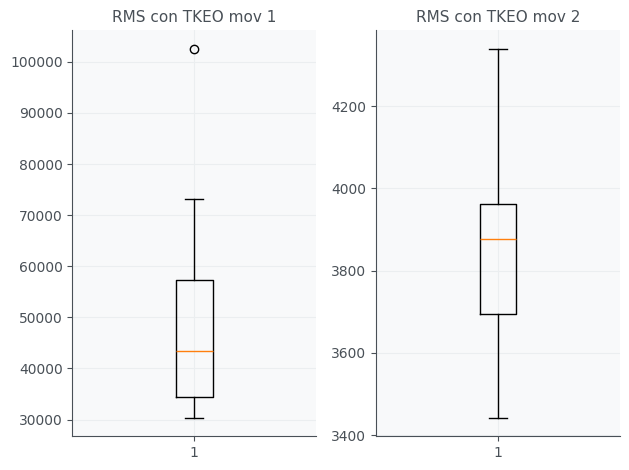

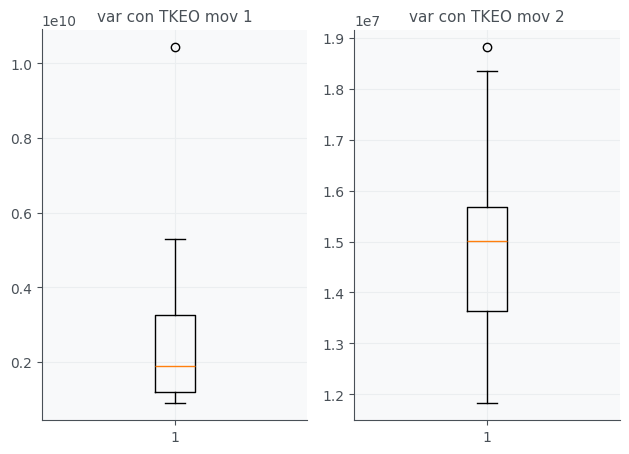

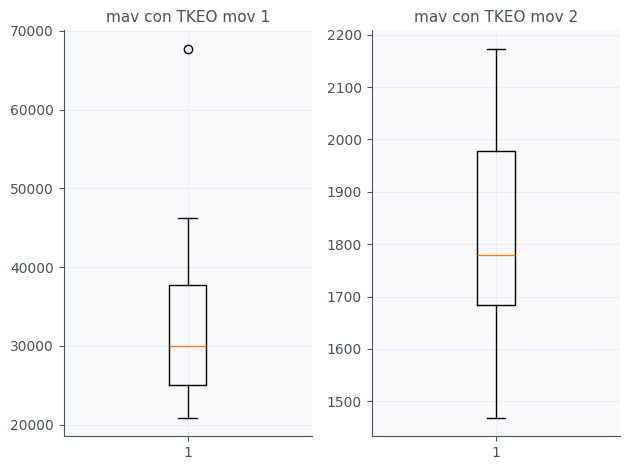

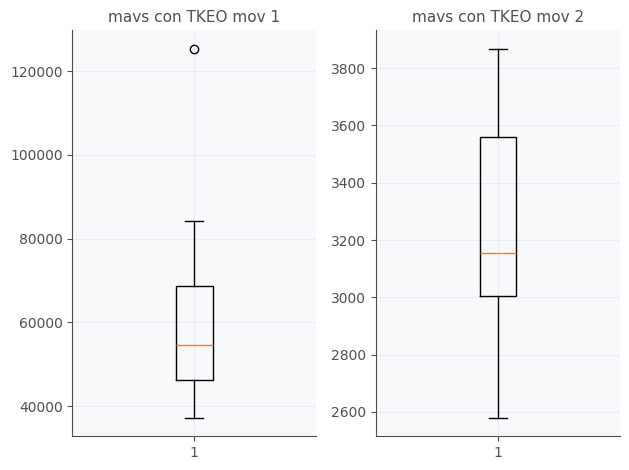

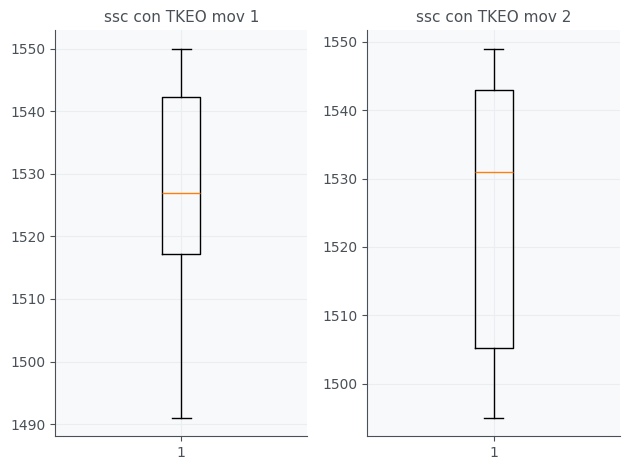

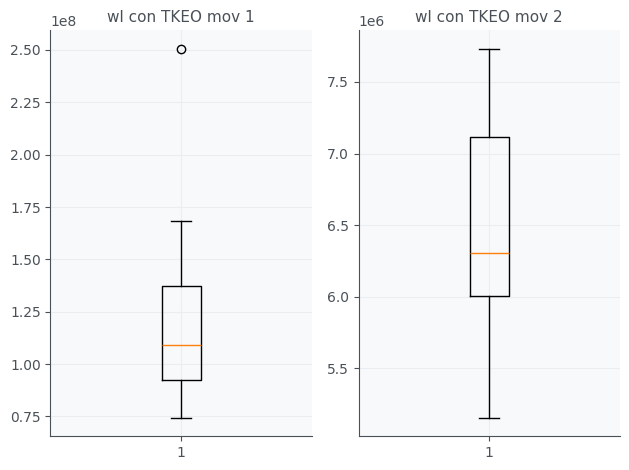

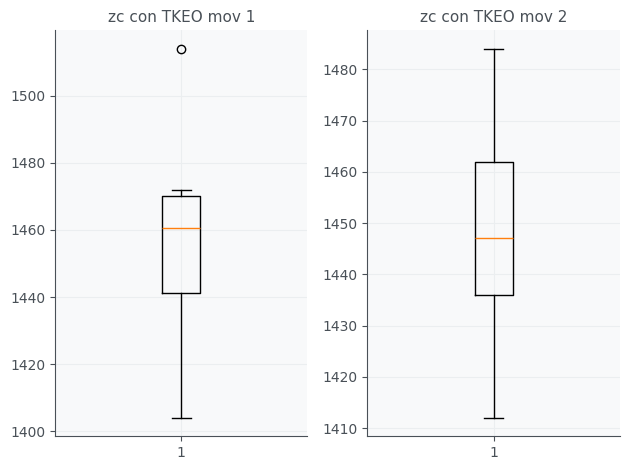

In [370]:
for ii in range(1,8):
    plt.figure(ii)
    plt.subplot(1,2,1)
    plt.boxplot(np.asarray(output.iloc[:,ii]))
    plt.title(columT[ii]+ " con TKEO mov 1")
    plt.subplot(1,2,2)
    plt.boxplot(np.asarray(output_prona.iloc[:,ii]))
    plt.title(columT[ii]+ " con TKEO mov 2")
    plt.tight_layout()

Comparativa prona

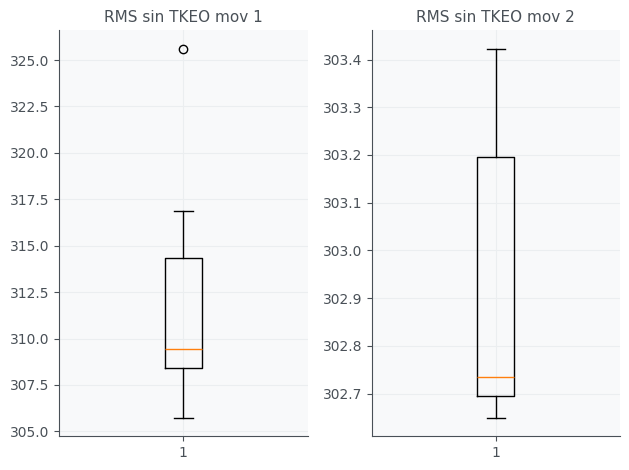

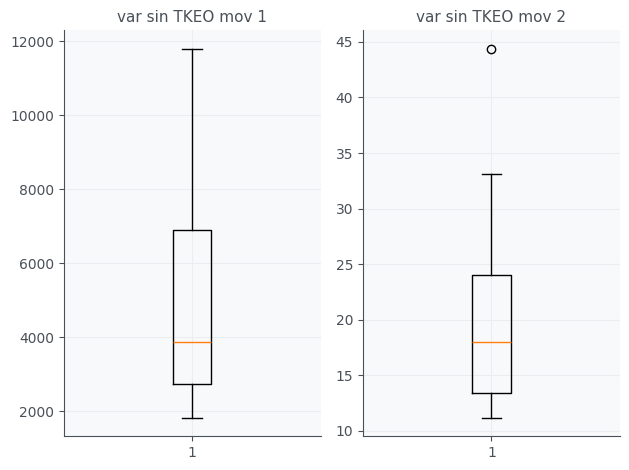

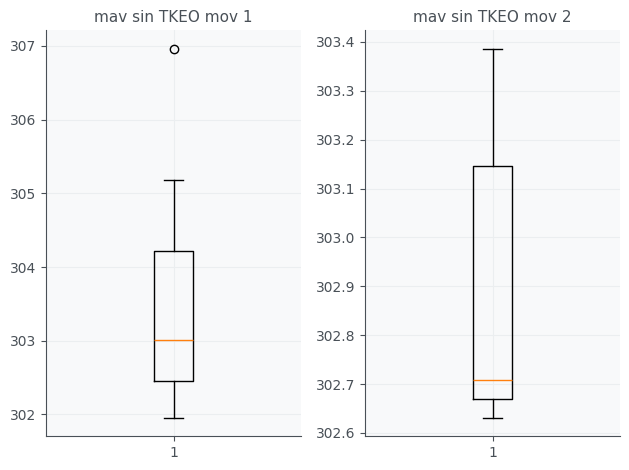

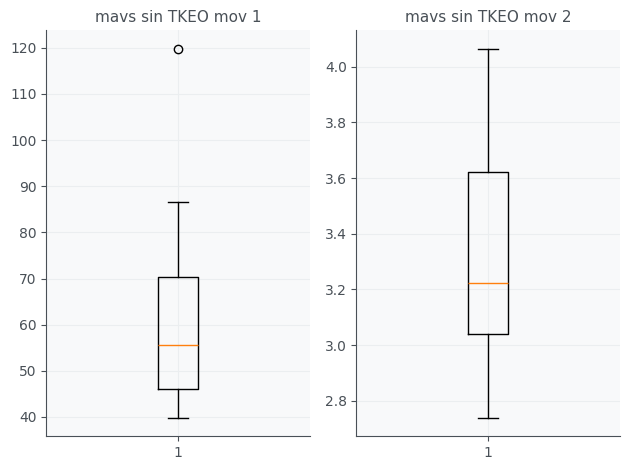

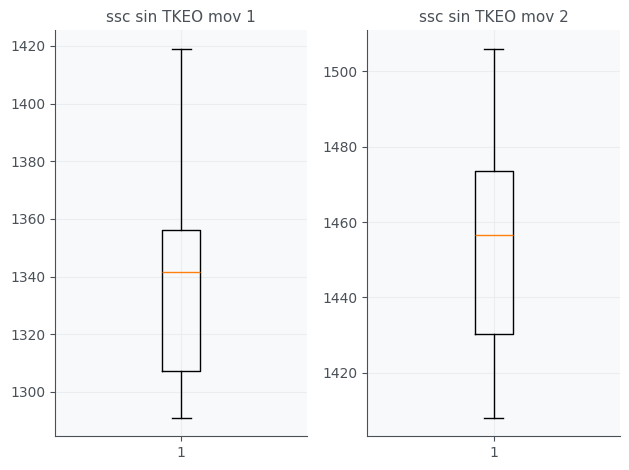

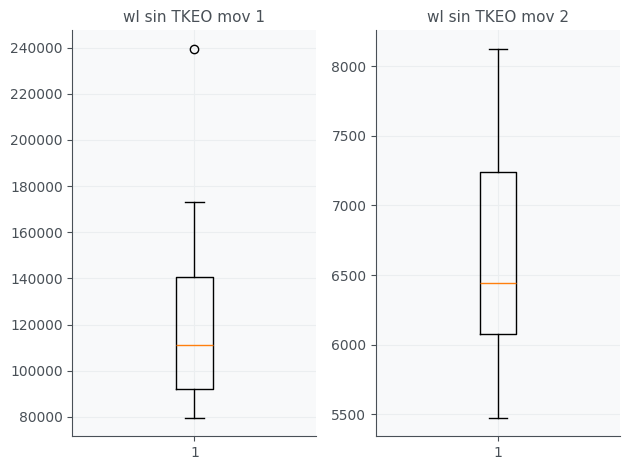

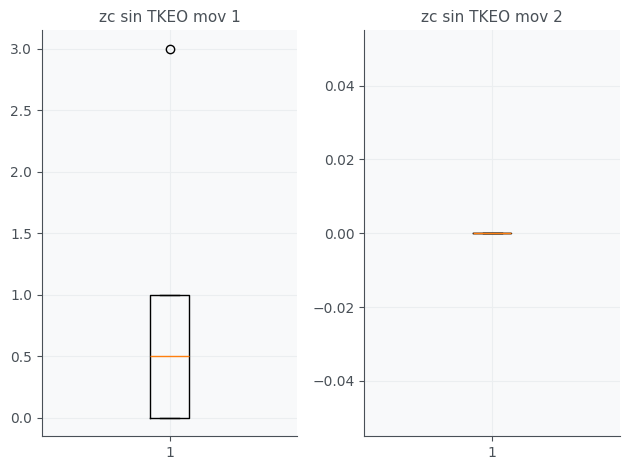

In [378]:
for ii in range(1,8):
    plt.figure(ii)
    plt.subplot(1,2,1)
    plt.boxplot(np.asarray(output2.iloc[:,ii]))
    plt.title(columT[ii]+ " sin TKEO mov 1")
    plt.subplot(1,2,2)
    plt.boxplot(np.asarray(output2_prona.iloc[:,ii]))
    plt.title(columT[ii]+ " sin TKEO mov 2")
    plt.tight_layout()

 Se realizo la comparacion de los movimientos sin TKEO, y se logro observar una menor diferencia en las distribuciones de las variables de los movimientos de flexion y pronacion, en comparacion con las distribuciones de las metricas cuando se aplicaba el operador TKEO

Basandonos de un analisis visual de las distribuciones graficadas en boxplots, se dedujo que una de las diferencias mas notables se evidenciaba en la metrica de RMS, por lo que fue esta la que empleamos para el proceso de analisis inferencial

Para el analisis inferencial solo se consideraron los movimientos despues de haber aplicado el operador TKEO

In [383]:
# Prueba de NORMALIDAD , Kolmogorov-Smirnov
valueTKEO_flexi=stats.kstest(output.iloc[:,1],"norm")
valueTKEO_prona=stats.kstest(output_prona.iloc[:,1],"norm")
print("VALOR P, PRUEBAS DE NORMALIDAD")
print(f"P value muestra TKEO flexion: {valueTKEO_flexi.pvalue}")
print(f"P value muestra TKEO pronacion: {valueTKEO_prona.pvalue}")

# Prueba de HOMOCEDASTICIDAD, levene
valuel=stats.levene(output.iloc[:,1],output_prona.iloc[:,1])
print("VALOR P, PRUEBAS DE HOMOCEDASTICIDAD")
print(f" P value comparación 1: {valuel.pvalue}")

VALOR P, PRUEBAS DE NORMALIDAD
P value muestra TKEO flexion: 0.0
P value muestra TKEO pronacion: 0.0
VALOR P, PRUEBAS DE HOMOCEDASTICIDAD
 P value comparación 1: 0.00383838810982471


Teniendo en cuenta que no se cumplen los supuestos de Normalidad y homocedasticidad ya que en cada caso el P value es menor al nivel de significancia establecido (0.05), se procedió a hacer un análisis no paramétrico empleando la prueba de Mann-Whitney . 

se establece entonces
H0: La diferencia entre las medianas de los valores RMS de la señal EMG de la flexion del bicep y la pronacion, ambas con el operador (TKEO) no es estadisticamente significativa
H1: La diferencia entre las medianas de los valores RMS de la señal EMG de la flexion del bicep y la pronacion, ambas con el operador (TKEO) es estadisticamente significativa

In [384]:
# prueba Mann-Whitney 
valuem=stats.mannwhitneyu(output.iloc[:,1],output_prona.iloc[:,1])

print("VALOR P, PRUEBA Mann-Whitney ")
print(f" P value comparación 1: {valuem.pvalue}")

VALOR P, PRUEBA Mann-Whitney 
 P value comparación 1: 3.6584553538971e-05


El P value obtenido en cada caso es menor al nivel de significancia establecido (0.05) por lo que la hipotesis nula se rechaza, es decir la diferencia entre las medianas de los valores RMS de la señal EMG de la flexion del bicep y la pronacion, ambas con el operador (TKEO) es estadisticamente significativa

Conclusiones:

El análisis de las gráficas del movimiento 1 (flexión-extensión) revela claramente el efecto del operador TKEO (Teager-Kaiser Energy Operator) en las señales obtenidas. Se observa una mejora significativa en la detección y amplificación de los momentos de actividad muscular, lo que demuestra la eficacia de esta técnica en la mejora de la precisión y la sensibilidad de la adquisición de señales EMG. Esto resalta la importancia del operador TKEO  en el procesamiento de señales para aplicaciones de control mioeléctrico, destacando su capacidad para resaltar características relevantes y facilitar una interpretación más precisa de la actividad muscular.

Considerando que la diferencia entre las medianas de los valores RMS de la señal EMG durante la flexión-extensión del bíceps y la pronación-supinación es estadísticamente significativa, se puede sugerir que hay una disparidad notable en la actividad muscular medida entre estos dos movimientos específicos, lo que tendría implicaciones en el diseño y la implementación de dispositivos de control mioeléctrico, ya que resalta la necesidad de considerar las características específicas de la actividad muscular asociadas con diferentes movimientos